# Programming for Data Analysis 
## Student Name: Sam Tracey
## Student ID: G00398245
## November 2021

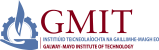
***

# The NumPy Random Package.

[Official Numpy Documentation](https://numpy.org/doc/stable/reference/random/index.html)

***

1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

<br>

## What is NumPy?

***

NumPy, which stands for Numerical Python, is an open sourced Python library. Created in 2005 by Travis E. Oliphant NumPy combined the features of two older Python packages:<br>
Numeric and Numarray ([1](https://www.nature.com/articles/s41586-020-2649-2)). Today NumPy is considered the universal standard for working with numerial data in Python and is
extensively used in engineering and science ([2](https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54))<br>
<br>
A key feature of NumPy is its N-Dimensional Array (ndarray) object. ([3](https://numpy.org/doc/stable/user/whatisnumpy.html)) Inherently, Python has lists which serve the purpose of an array however, these are slow to process due to the fact that a Python list is actually made up of pointers referencing an object in memory. ([4](https://medium.com/@gough.cory/performance-of-numpy-array-vs-python-list-194c8e283b65)) A NumPy array on the other hand is a collection of similar data-types stored in one continuous place in memory. To see how much faster a NumPy array is when compared to a Python list we can run the code below in which we create a list of one million elements and a NumPy array of one million elements.<br> We then calculate how long it takes to perform a simple mathematical operation on each element. In this example, NumPy performs the
operation approximately 65 times faster.


In [1]:
# Import NumPy package
import numpy as np

# create a Numpy array.
numpy_arr = np.arange(1000000)

# create a python list.
python_list = list(range(1000000))

# print out execution time for raising each element in the array to the power of 2.
print("NumPy Processing Time")
%time for i in range(10): numpy_arr = numpy_arr ** 2
 
# print out execution time for raising each element in the array to the power of 2.
print("List Processing Time")
%time for i in range(10): python_list2 = [x ** 2 for x in python_list]

NumPy Processing Time
Wall time: 26.3 ms
List Processing Time
Wall time: 2.64 s


<br>

Some key aspects of the ndarray are:
- They are homogenous. All items in an ndarray must be of the same type.
- The number of dimensions of an ndarray is defined by the ndarray shape.
- A separate data-type object (dtype) specifies the type of items in the ndarray.
- The size attribute indicates the total number of elements in the ndarray.


<br>

## The numpy.random package.

***

The <code>numpy.random</code> module provides the user with the ability to generate full arrays of pseudo-random numbers of specified shapes. It is considered supplemental to Python's built-in *random* module which only samples one value at a time.[5]<br>

A pseudo-random number is a mathematically generated sequence of nearly random numbers. All software pseudo-random generators (including numpy.random) work in fundamentally the<br> same way:  
> They start with a random number, known as the seed, and then use an algorithm to generate a pseudo-random sequence of bits based on it. ([6](https://docs.microsoft.com/en-us/windows/win32/api/wincrypt/nf-wincrypt-cryptgenrandom?redirectedfrom=MSDN))

We will cover pseudo-random numbers and seeds in a later section.<br>

The <code>numpy.random</code> package enables us to create arrays based on known statistical distributions which is of huge significance in the Data Science community. Rather than having to collect data from an experiment or trial, data scientists can generate data using the numpy.random package to evaluate different hypotheses.  

<br>

## Simple Random Data

***

The <code>numpy.random</code> package provides several functions for generating simple random data:


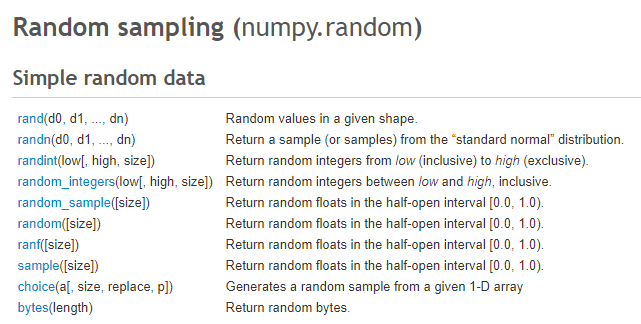

In this section we are going to discuss each of these functions and investigate how they can be used.

***

### numpy.random.rand

The numpy.random.rand function returns a Numpy array containing numbers drawn from the standard uniform distribution between the values of 0 and 1. A uniform distribution in statistics is a probability distribution in which all outcomes are equally as likely.([7](https://www.britannica.com/topic/uniform-distribution-statistics))

 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



In [3]:
# Define the style to be used.
plt.style.use('seaborn')

In [4]:
# Define pyplot figure size
plt.rcParams['figure.figsize'] = [12, 8]

In [5]:
# create a one dimensional array with 10 elements.
x = np.random.rand(10)
# Show array contents and attributes of the array.
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)


[0.28543142 0.8378853  0.25403595 0.39942982 0.4383471  0.99099064
 0.89208671 0.53161908 0.01591736 0.02844431]
The number of dimensions in the array =  1
The shape of the array =  (10,)
The number of elements in the array =  10


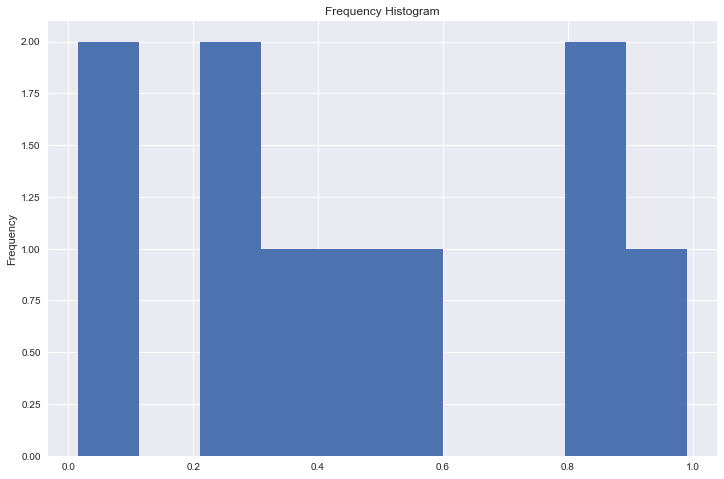

In [6]:
# Create the histogram with 10 bins.
plt.hist(x, bins=10)
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()


<br>
Our array (x) has 1 dimension, 10 elements and a shape of (10,). The distribution of the data in the histogram should be uniform - i.e the probability of getting each value should be the same however, with a small sample size (10 values) this may not be apparent. Let's try the same thing with a much larger number of samples:

In [7]:
# create a one dimensional array with 1000000 elements.
y = np.random.rand(1000000)
# Show array contents and attributes of the array.
print(y)
print("The number of dimensions in the array = ", y.ndim)
print("The shape of the array = ", y.shape)
print("The number of elements in the array = ", y.size)

[0.71212016 0.29063607 0.9901059  ... 0.20664657 0.84094649 0.29650354]
The number of dimensions in the array =  1
The shape of the array =  (1000000,)
The number of elements in the array =  1000000


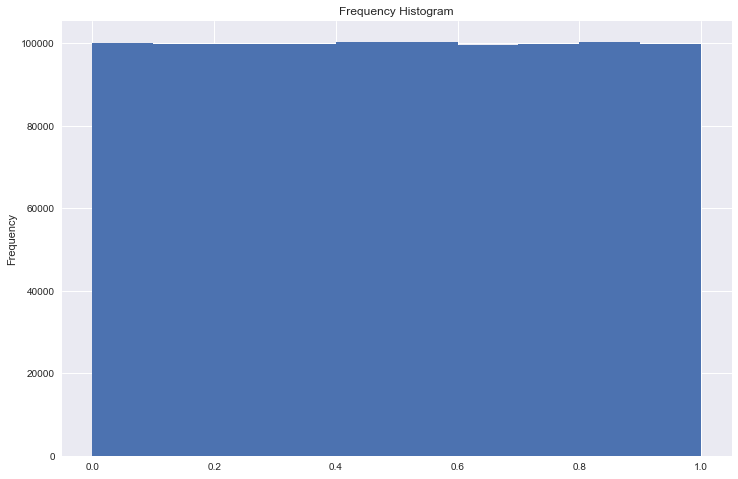

In [8]:
# Create the histogram with 10 bins.
plt.hist(y, bins=10)
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()

<br>

With a sample size of one million elements we now see that our random data is more closley approximating the uniform distribution.


In the above example we created a one dimensional Numpy array. We can also create multi-dimensional arrays.

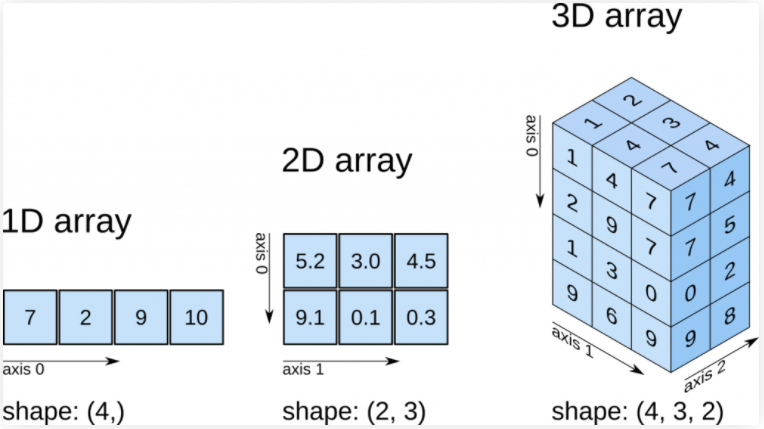

In [9]:
# Generating a two dimensional array
x = np.random.rand(2, 5)
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)

[[0.10180193 0.42344917 0.59787459 0.22165014 0.95041509]
 [0.00487373 0.08438102 0.6189107  0.0802176  0.08331252]]
The number of dimensions in the array =  2
The shape of the array =  (2, 5)
The number of elements in the array =  10


In [10]:
# Generating a three dimensional array
x = np.random.rand(2, 3, 5)
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)

[[[0.75449041 0.23154471 0.86699787 0.65236162 0.10760531]
  [0.6350319  0.15069574 0.61368469 0.08527548 0.51849505]
  [0.85567361 0.5684446  0.24422852 0.47361898 0.40097525]]

 [[0.18486684 0.59834812 0.25624963 0.7583978  0.8725002 ]
  [0.90308638 0.72468694 0.24320371 0.01250352 0.35302459]
  [0.80186729 0.77692568 0.39779148 0.32331061 0.04031597]]]
The number of dimensions in the array =  3
The shape of the array =  (2, 3, 5)
The number of elements in the array =  30


<br>

## numpy.random.randn

***


Where the <code>numpy.random.rand</code> function returns an array containing numbers drawn from the standard uniform distribution, the <code>numpy.random.randn</code> function returns an array containing numbers drawn from the standard normal distribution.
The standard normal distribution is a normal distribution with a mean of 0 and a standard deviation of 1:

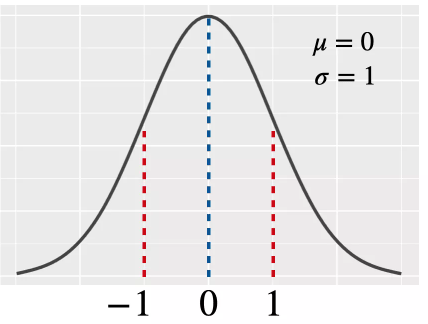

As with the numpy.random.rand function, we can pass different values to the numpy.random.randn function to control the number of elements and dimensions in the array.

In [11]:
# create a one dimensional array with 1000000 elements drawn from the standard normal distribution.
x = np.random.randn(1000000)
# Show array contents and attributes of the array.
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)
print("The mean of elements in the array = ", x.mean())
print("The standard deviation of elements in the array = ", x.std())


[-0.28589996 -0.38966637 -1.52121238 ... -1.97268488  1.53877356
 -1.22103235]
The number of dimensions in the array =  1
The shape of the array =  (1000000,)
The number of elements in the array =  1000000
The mean of elements in the array =  0.0011368710303313954
The standard deviation of elements in the array =  1.0003516751403203


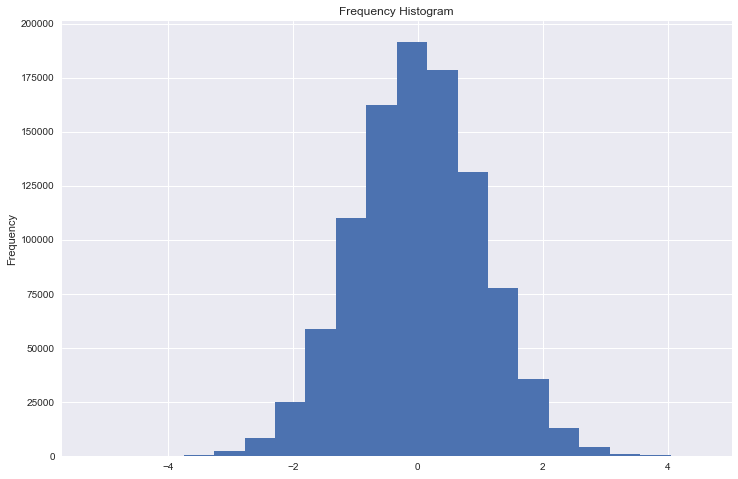

In [12]:
# Create the histogram with 20 bins.
plt.hist(x, bins=20)
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()

In [13]:
from scipy.stats import shapiro
# Test normality of the numpy.random.randn array
stat, p = shapiro(x)
print("P-value = ", p)
# interpret p-value at an alpha level of 0.05
alpha = 0.05
if p > alpha:
	print('Sample data appears to be from the normal distribution (fail to reject H0)')
else:
	print('Sample does not appear to be from the normal distribution(reject H0)')

P-value =  1.0
Sample data appears to be from the normal distribution (fail to reject H0)


C:\Users\stracey\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<br>

## numpy.random.randint

***

The previous two numpy.random functions have drawn samples from specific distributions that have pre-defined upper and lower limits. The <code>numpy.random.randint</code> like the <code>numpy.random.rand</code> function draws samples from the discrete uniform distribution but unlike we are able to specify low limits and high limits for the samples. Another difference between the <code>numpy.random.randint</code> function and the numpy.random.rand function is that the array returned consists of integers rather than float values.([8](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html))

There are 4 possible parameters that we can pass to the <code>numpy.random.randint</code>: (low, high, size, dtype)

- Low: Lowest integer to be drawn from the distribution (inclusive).
- High (optional): One above the higest integer to be drawn from the distribution (exclusive)
- Size: Output shape of the array.
- dtype: Data type of the array to be returned. The default value is integer.

In [14]:
# Dice rolling Simulation
# Define the number of rolls of the dice.
rolls = 100000
# create a one dimensional array of random samples with a low value of 1, a high value of 6 and 100000 elements
dice = np.random.randint(1, 7,  rolls)
# Look at a sample of the integers in the array
dice


array([3, 5, 3, ..., 6, 5, 5])

In [15]:
# Count the number of times each score appears
score, counts = np.unique(dice, return_counts = True)
score, counts

(array([1, 2, 3, 4, 5, 6]),
 array([16615, 16728, 16512, 16771, 16820, 16554], dtype=int64))

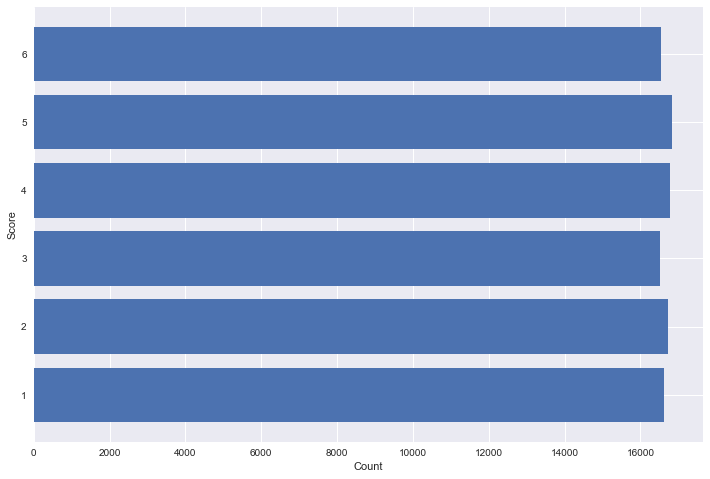

In [16]:
# Create a new plot
fig, ax = plt.subplots()
# Bar Chart
ax.barh(score, counts)
# Set axis labels
ax.set_ylabel('Score')
ax.set_xlabel('Count');
plt.show()

<br>

It is also possible to create multi-dimensional arrays. To continue with the dice rolling simulation, if we wanted to simulate the rolling of two die we could create a two dimensional numpy.random.randint array:

In [17]:
# The number of dice to roll in each turn.
no_dice = 2
# The number of turns.
no_turns =10000
# Roll the dice.
dice = np.random.randint(1, 7, (no_turns, no_dice))
# Have a look at dice.
dice

array([[4, 6],
       [2, 2],
       [2, 6],
       ...,
       [1, 1],
       [5, 2],
       [3, 5]])

<br>

## numpy.random.choice

***

The <code>numpy.random.choice</code> function generates a random sample taken from a one dimendional array or a range of integers. There are 4 parameters that can be passed to the function: (a, size, replace, p).

- a: A one dimensional array or integer. If an integer is used, the random choice will be from 0 up to (but not including) the integer value.
- size: The shape of the data returned.
- replace: Whether the sample is performed with or without replacement.
- p: The probabilities associated with each entry in a.

In [18]:
# Generate random lottery numbers.
# Create a numpy array with values from 1 to 50.
num_balls = np.arange(1,51,1)
# Define the number of numbers to generate.
num_choices = 6
# Create array containing random choices without replacement (i.e you cannot draw the same ball twice)
lottery_numbers = np.random.choice(num_balls, num_choices, replace=False)
print(lottery_numbers)

[15 28 27 43 25 44]


<br>

## numpy.random.random_sample

***

The documentation for the <code>numpy.random.random_sample</code> function indicates that it returns "Random floats in the half-open interval (0.0, 1.0)" from the continuous uniform distribution. The half-open interval is a mathematical term meaning that one endpoint is included but not the other ([9](https://mathworld.wolfram.com/Interval.html)). In other words, the elements returned by the numpy.random.random_sample function will be samples from 0.0 (inclusive) up to, but not including, 1.0.

The following numpy functions are all aliases of the <code>numpy.random.random_sample</code> function:

- <code>numpy.random.random</code>
- <code>numpy.random.ranf</code>
- <code>numpy.random.sample</code>



In [19]:
# Return a single sample from the continuous uniform distribution
np.random.random_sample()

0.49363910425969704

In [20]:
# Create an ndarray of 1000000 elements using the numpy.random.random function.
x = np.random.random_sample(1000000)
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)
print("The mean of elements in the array = ", x.mean())
print("The standard deviation of elements in the array = ", x.std())

[0.64060575 0.63392183 0.55126094 ... 0.01532625 0.34584909 0.90702577]
The number of dimensions in the array =  1
The shape of the array =  (1000000,)
The number of elements in the array =  1000000
The mean of elements in the array =  0.5002759830651601
The standard deviation of elements in the array =  0.2886676418656699


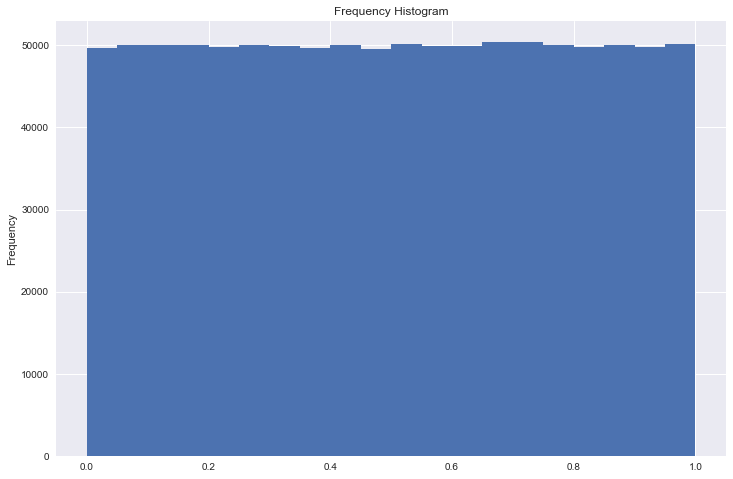

In [21]:
# Visualize the distribution.
# Create the histogram with 20 bins.
plt.hist(x, bins=20)
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()

<br>

As we can see the returned ndarray approximates the continuous uniform distribution.

In [22]:
# Creating a two dimensional array using numpy.random.random_sample.
np.random.random_sample((3,2))

array([[0.28764175, 0.42715657],
       [0.52976277, 0.6490506 ],
       [0.5360904 , 0.84023914]])

<br>

## numpy.random.bytes

***

The <code>numpy.random.bytes</code> function takes a length parameter and returns a string of bytes of that length. The bytes class in Python is a binary serialisation format represented by a sequence of eight bit integers with which you can store data on the file system or transmit via the internet. The byte class can only contain ASCII literal characters. Since the release of Python 3, the bytes class is always preceded with a b'. Since PEP 3137, the bytes object is immutable i.e it's state cannot be modified after it is created.([10](https://www.python.org/dev/peps/pep-3137/))

In [23]:
# Create a random bytes object of length 10.
x = np.random.bytes(10)
# Print information about x
print(x)
print(type(x))

b'\x8fRn\x8c\xf6%\xe0\xe0\x13k'
<class 'bytes'>


<br>

## Permutation Functions.

***

A permutation is the rearrangement of an ordered list. The number of permutations for a list of length n is dentoed by the mathematical formula n! (n factorial). In other words, if you have a list of length 5, the number of possible permutations (number of different orders) is 5! (5x4x3x2x1) = 120.

Python has two different functions which deal with permutations:

- <code>numpy.random.shuffle</code>
- <code>numpy.random.permutation</code>


The key difference between these two functions is that <code>numpy.random.shuffle</code> makes changes to the original array i.e it modifies the sequence *in-place* whereas the numpy.random.permutation function returns a re-arranged array and leaves the original array un-changed.([11](https://www.w3schools.com/python/numpy/numpy_random_permutation.asp)) In both functions, if the original array is multi-dimensional, the rearrangement only occurs along the first index.


In [24]:
# Create two arrays
x = np.arange(5)
y = np.arange(5)
print('x = ', x)
print('y = ', y)

x =  [0 1 2 3 4]
y =  [0 1 2 3 4]


In [25]:
# Call the permutation function on array y
print(np.random.permutation(y))
# Print out elements of array y
print('y = ', y)

[2 4 0 3 1]
y =  [0 1 2 3 4]


In [26]:
# Call the shuffle function on array x.
print(np.random.shuffle(x))
# Print out elements of array x.
print('x = ', x)

None
x =  [2 1 3 4 0]


<br>

From the code results above you can see that the <code>numpy.random.permutation</code> function returns a permuted sequence while leaving the order of the orginal array unchanged. The <code>numpy.random.shuffle</code> function on the other hand makes the order change in-place - i'e the original array is re-ordered and returned.

In [27]:
# Define a multi-dimensional array ranging from 0 to 14.
multi_shuffle = np.arange(15).reshape((3, 5))
multi_shuffle

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [28]:
# Re-order array using shuffle function.
np.random.shuffle(multi_shuffle)
multi_shuffle

array([[10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9]])

In [29]:
# Define a multi-dimensional array ranging from 0 to 14.
multi_permutation =  np.arange(15).reshape((3, 5))
multi_permutation

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [30]:
# Re-order array using permutation function.
print(np.random.permutation(multi_permutation))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


When applying either permutation or shuffle on a multi-dimensional array, you can see that the re-ordering only takes place on axis 0 of the array (vertically)

<br>

## Explain the use and purpose of at least five “Distributions” functions.

***

Probability and statistics are the foundations of data science and the underlying principles of both data science and machine learning rely heavily on statistical mathematics and linear algebra.([12](https://www.datacamp.com/community/tutorials/probability-distributions-python))

A probability distribution is a summary of probabilities for the values of a random variable. It is a staticitcal function that decribes all possible values that the random variable can take within a given range. It is important when discussing probability distributions to differentiate between discrete and continuous random variabes:

- A discrete random variable is one which can only take on specific, countable number of distinct values. e.g. When rolling a (fair) dice there 6 possible values in a single roll and each value has the same probability of occurring (0.16667).
- A continuous random variable is one which can take an infinite number of potential vlaues. Continuous random variables are often measurements (e.g. height, weight, temperature).

NumPy has an extensive list of distributions from which we can generate data:

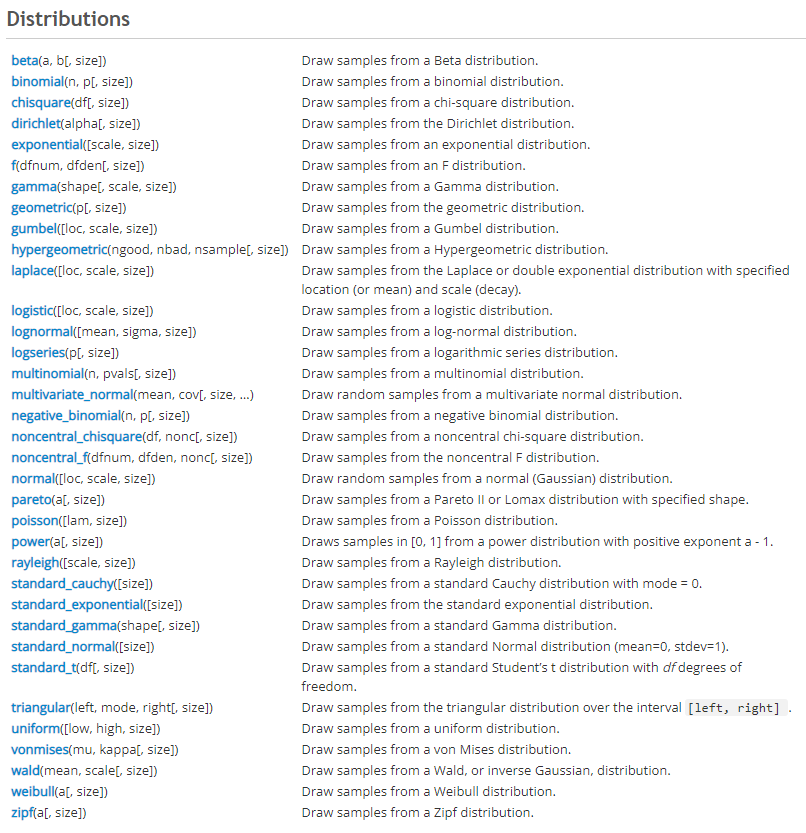

For the purpose of this project we are going to review five of the listed distributions:

1. Normal Distributution (Draw random samples from a normal (Gaussian) distribution.)
2. Exponential Distribution (Draw samples from an exponential distribution.)
3. Uniform (Draw samples from a uniform distribution.)
4. Weibull (Draw samples from a Weibull distribution.)
5. Binomial (Draw samples from a binomial distribution.)

<br>

## Normal Distribution

***


The <code>numpy.random.normal(loc=0.0, scale=1.0, size=None)</code> function draws random samples from the normal (Gaussian) distribution. The normal distribution has certain key parameters:

- µ, representing the mean of the distribution and defined using the loc parameter
- σ, representing the standard deviation or spread of the data and defined using the scale paramter.

According to the NumPy documentation:
>The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random >disturbances, each with its own unique distribution.

When plotted, the normal distribution takes on a distinctive "bell curve" shape defined by its mean and standard deviation. According to [Wolfram](https://mathworld.wolfram.com/NormalDistribution.html) it is common for mathematicians to refer to the distribiution as the "normal distribution", for physicists to refer to it as the "Gaussian distribution" and for Social scientists to refer to it as the "Bell curve". In my industry (industrial manufacturing) it is ubiquitously referred to as the normal distribution.

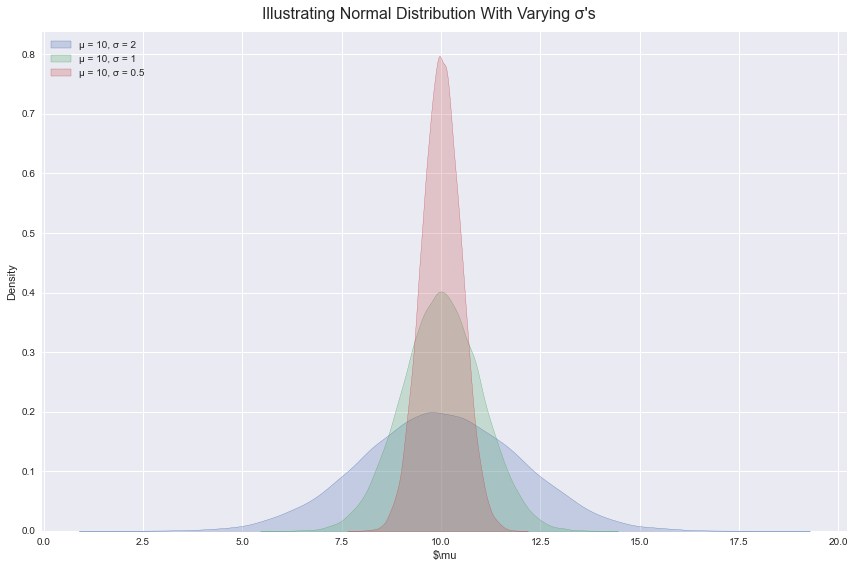

In [31]:
# Illustrating the impact of scale
# Define 3 ndarrays with varying standard deviation (scale) values
sigma1 = np.random.normal(10, 2, 50000)
sigma2 = np.random.normal(10, 1, 50000)
sigma3 = np.random.normal(10, 0.5, 50000)

# using seaborn kdeplot to plot different scale(standard deviation) distributions
sns.kdeplot(sigma1, fill = True, label = 'µ = 10, σ = 2')
sns.kdeplot(sigma2, fill = True,  label = 'µ = 10, σ = 1')
sns.kdeplot(sigma3, fill = True, label = 'µ = 10, σ = 0.5')
# Define graph legend, labels and layout
plt.legend(loc='upper left')
plt.xlabel('$\mu')
plt.suptitle("Illustrating Normal Distribution With Varying σ's", fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

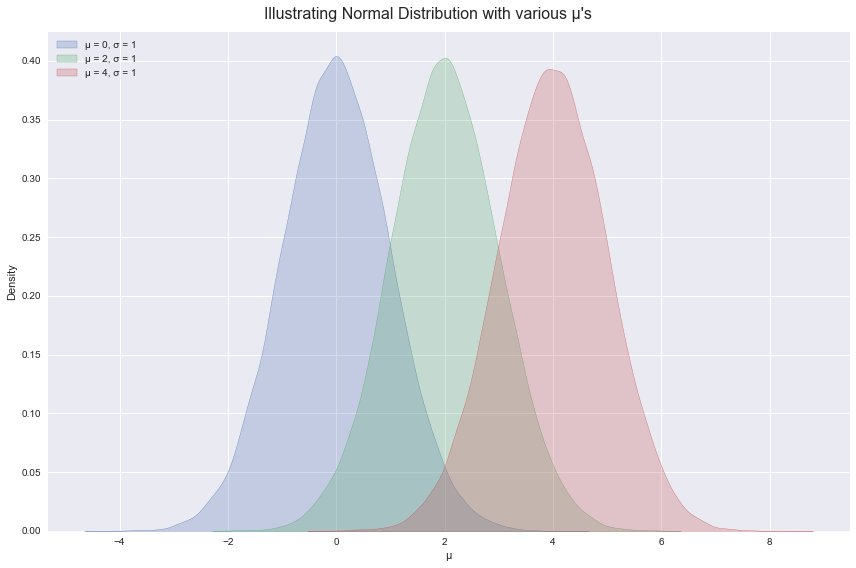

In [32]:
# Illustrating the impact of loc
# Define 3 ndarrays with varying mean values
mean1 = np.random.normal(0, 1, 50000)
mean2 = np.random.normal(2, 1, 50000)
mean3 = np.random.normal(4, 1, 50000)

# use seaborn kdeplot functions to plot differnt loc(mean) distributions
sns.kdeplot(mean1, fill = True, label = 'µ = 0, σ = 1')
sns.kdeplot(mean2, fill = True,  label = 'µ = 2, σ = 1')
sns.kdeplot(mean3, fill = True, label = 'µ = 4, σ = 1')
# Define graph legend, labels and layout
plt.legend(loc='upper left')
plt.xlabel('µ')
plt.suptitle("Illustrating Normal Distribution with various µ's", fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

<br>

## Real World Example of Using <code>numpy.random.normal</code>

***

In almost all industries it is overly expensive and time consuming to collect data on an entire population. In this scenario we would take a sample of the population with sufficient size and power to ensure that inferences made from the sample are representative of the popuation as a whole.

For example, take the following table which defines the Anthropometric measurements of Irish children in 2019:([13](https://doi.org/10.1017/S1368980020000920))


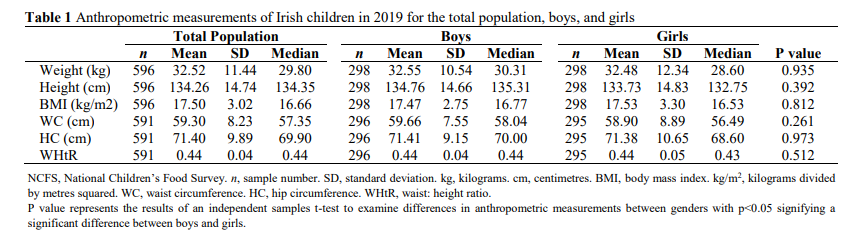

The authors have used a sample size of 596 children (298 boys and 298 girls) to infer information regarding the entire population of Irish children. With this data we can now visualise the data.

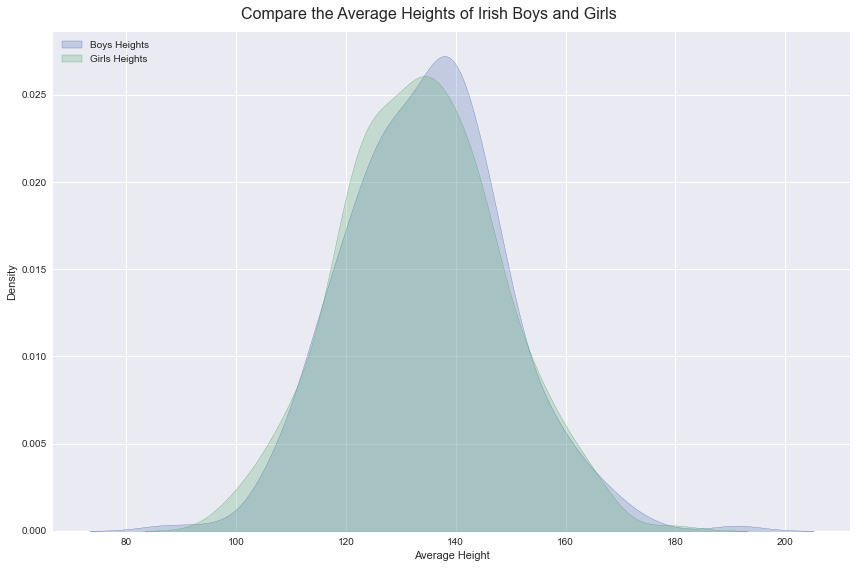

In [33]:
np.random.seed(42)
height_boys = np.random.normal(134.76, 14.66, 298)
height_girls = np.random.normal(133.73, 14.83, 298)

sns.kdeplot(height_boys, fill = True, label = 'Boys Heights')
sns.kdeplot(height_girls, fill = True,  label = 'Girls Heights')
plt.legend(loc='upper left')
plt.xlabel('Average Height')
plt.suptitle('Compare the Average Heights of Irish Boys and Girls', fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

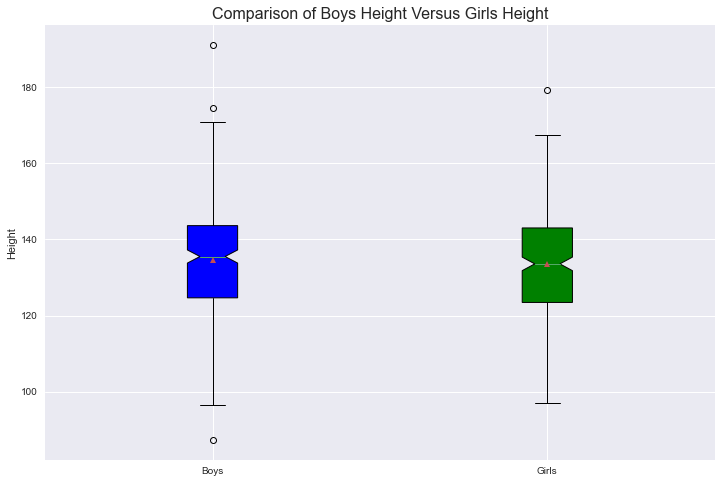

In [34]:

columns = [height_boys, height_girls]
fig, ax = plt.subplots()
box = ax.boxplot(columns, notch=True, patch_artist=True, showmeans=True)
colors = ['blue', 'green']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# plt.boxplot(data, notch=True, patch_artist=True)
plt.title('Comparison of Boys Height Versus Girls Height', fontsize=16)
plt.ylabel('Height')
plt.xticks([1, 2], ['Boys', 'Girls'])

plt.show()



In [35]:
# Is there a statistical difference in the height of boys versus girls?

from scipy.stats import ttest_ind
stat, p = ttest_ind(height_boys, height_girls)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The distributions are the same (fail to reject H0)')
else:
	print('The distributions are not the same (reject H0)')

Statistics=0.901, p=0.368
The distributions are the same (fail to reject H0)


## References

[1] Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). Available at:https://doi.org/10.1038/s41586-020-2649-2<br>
    accessed 24th October 2021<br>
[2] Bonner, A. The Ultimate Beginner’s Guide to NumPy. Towards Data Science (2019). Available at: https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54 <br> accessed 24th October 2021<br>
[3] numpy.org, What is NumPy? 2021. Available at: https://numpy.org/doc/stable/user/whatisnumpy.html accessed 24th October 2021<br>
[4] Gough, C. Performance of Numpy Array vs Python List (2019). Available at: https://medium.com/@gough.cory/performance-of-numpy-array-vs-python-list-194c8e283b65 accessed 24th October 2021.<br>
[5] McKinney, M. Python for Data Analysis. 120-124 (2018).<br>
[6] Micorsoft (2021). CryptGenRandom function (wincrypt.h). Available at:https://docs.microsoft.com/en-us/windows/win32/api/wincrypt/nf-wincrypt-cryptgenrandom?redirectedfrom=MSDN accessed 24th October 2021.<br>
[7] Hosch, L. W, Britannica. Uniform Distribution. Available at: https://www.britannica.com/topic/uniform-distribution-statistics accessed 31st October 2021.<br>
[8] numpy.org, numpy.random.randint. Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html accessed 31st October 2021 <br>
[9] Weisstein, Eric W. "Interval." From MathWorld--A Wolfram Web Resource. Available at: https://mathworld.wolfram.com/Interval.html accessed November 11th 2021 <br>
[10] Van Rossum, G. PEP 3137 -- Immutable Bytes and Mutable Buffer (2007). Available at: https://www.python.org/dev/peps/pep-3137/ accessed November 11th <br>
[11] W3 Schools, Random Permutations. Available at: https://www.w3schools.com/python/numpy/numpy_random_permutation.asp accessed November 11th 2021<br>
[12] Pathak, M. Probability Distributions in Python Tutorial (2019). Available at: https://www.datacamp.com/community/tutorials/probability-distributions-python accessed 9th November 2021<br>
[13] O'Donnell, A., Buffini, M., Kehoe, L., Nugent, A., Kearney, J., Walton, J., Flynn, A., & McNulty, B. (2020). The prevalence of overweight and obesity in Irish children between 1990 and 2019. Public Health Nutrition, 23(14), 2512-2520. Available at:  https://doi.org/10.1017/S1368980020000920 accessed 9th November 2021

***

## End